# Tutorial for pMUTs Layout and Analysis Library

This notebook illustrates the basic features of the python classes and functions created for this project. The idea was to parametrize basic designs for individual piezoelectric micro-machined ultrasound transducers (pMUTs) as well as pMUTs arrays. Besides generating the .gds files of the devices layout, the code includes small libraries of materials and functions to perform simple analysis of the pMUTs such as equivalent circuit parameters extraction for the individual devices and radiation pattern of an array given its geometry, phases, frequency of operation, and the surrounding medium. 

The following python libraries are necessary to use the project:

- numpy
- scipy
- sympy
- matplotlib
- phidl
- pandas
- schemdraw

The imports are listed in the pMUT Functions.py files. 
I worked with Python 3.8.10.

Below I show how to use the code and how the analysis compares to FE models implemented in COMSOL.

## Individual pMUTs layout

To generate an instance of an individual pMUT (without vias, routing, and pads), simply run:

In [1]:
from pMUT_Classes import *

my_first_pmut = Individual_Unipolar_pMUT()

`my_first_pmut` is now an instance of an individual pMUT with default geometry parameters. Default parameters can be changed in the `Basic_pMUT` class in the pMUT_Classes.py file. 
The layout has not been added to `my_first_pmut` yet. To add the layout to `my_first_pmut` we use the method `draw_layout()`. We can then visualize the layout inline in the the notebook with the `qp` (quickplot) function from Phidl:

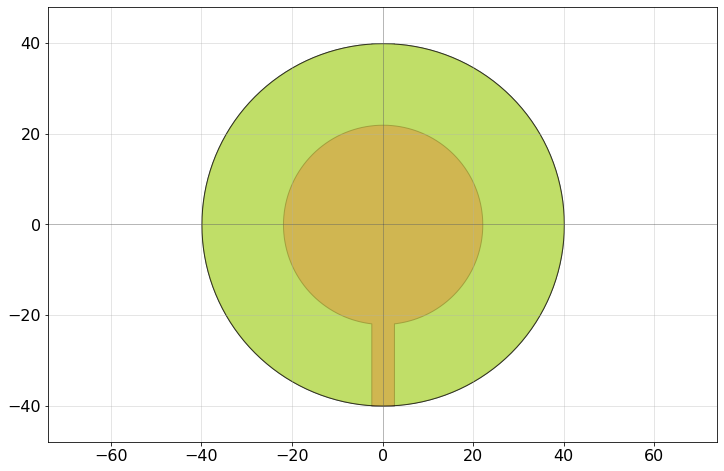

In [2]:
my_first_pmut.draw_pMUT()
qp(my_first_pmut.layout)

The green and red layers represent the bottom and top metals, respectively. Covered by the electrodes, there is a yellow area that represents the back-etch region, corresponding to the released area of the device. 

When creating an instance of a device, to change the parameters of the pMUT we pass them as an argument. For example, we can define a pMUT that is bipolar (i.e. both the center and outer electrodes are present), with 40 µm radius, a center electrode occupying 75% of the radius, a gap between the electrodes of 3 µm, and a connections width of 7 µm. We can also define the layers materials, thicknesses, and residual stress, which will affect the  parameters of the device such as its resonance frequency.

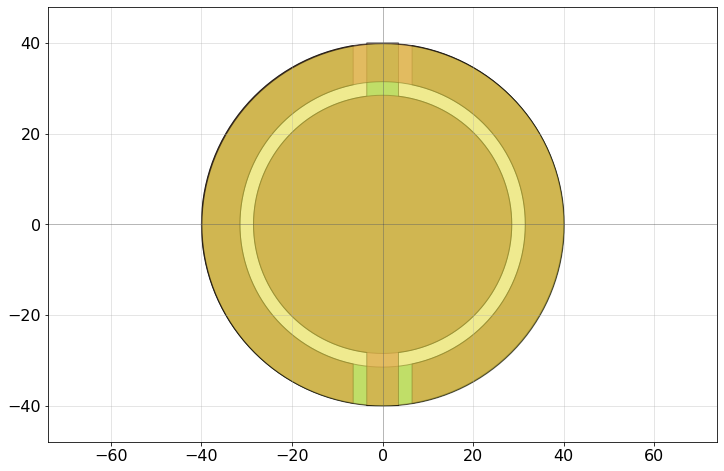

In [3]:
my_second_pmut = Individual_Bipolar_pMUT(
                    pMUT_Radius= 40e-6,                   # Radius of the pMUT in meters
                    BottomMetalLayer=0,                   # Assigned layer in the gds file
                    ViasLayer=1,                          # Assigned layer in the gds file
                    TopMetalLayer=2,                      # Assigned layer in the gds file
                    BackEtchLayer=3,                      # Assigned layer in the gds file
                    Center_Electrode_Fraction=0.75,       # Fraction of the radius occupied by the central electrode (minus half the gap if outer electrode is present)
                    Electrodes_Gap=3e-6,                  # Gap between inner and outer electrode in bipolar pMUT in meters. Does nothing in Unipolar pMUT
                    Connection_Width=7e-6,                # Width of the connection to the central electrodes in meters
                    Elastic_Material = Silicon_Oxide,     # Material taken from the Materials.py materials library
                    Elastic_Thickness = 1e-6,             # Thickness of the elastic layer in meters
                    Elastic_Stress = -100e6,              # Residual stress in the elastic layer in Pa
                    Bottom_Electrode_Material = Platinum,
                    Bottom_Electrode_Thickness = 200e-9,
                    Bottom_Electrode_Stress = 0e6,
                    Piezo_Material = ScAlN(36),
                    Piezo_Thickness = 1e-6,
                    Piezo_Stress = 200e6,
                    Top_Electrode_Material = Aluminum,
                    Top_Electrode_Thickness = 200e-9,
                    Top_Electrode_Stress = 0e6,
                    Medium_Material = Air 
                    )

my_second_pmut.draw_pMUT()
qp(my_second_pmut.layout)

Material properties are taken from the dictionaries included in the Materials.py file. For the piezoelectric layer, properties for AlScN with scandium concentrations between 0 and 50 can be used throught the ScAlN() function. If 0 is passed as an argument the properties coincide with the AlN dictionary also included in the Materials.py file. 

The equivalent parameters can be accessed as attributes of the device object. 
For example, we can get the plate equivalent stiffness Keq (in N/m) and its eigenfrequency: 

In [4]:
print('Stiffnesses')
print('Keq1: ' + "{:.2f}".format(my_first_pmut.equivalent_stiffness))
print('Keq2: ' + "{:.2f}".format(my_second_pmut.equivalent_stiffness))

print('\nEigenfrequencies')
print('f01: ' + "{:.2f}".format(my_first_pmut.eigenfrequency))
print('f01: ' + "{:.2f}".format(my_second_pmut.eigenfrequency))

Stiffnesses
Keq1: 1711.18
Keq2: 5664.81

Eigenfrequencies
f01: 3301341.95
f01: 3679565.72


The individual pMUTs attributes can be seen in the `Basic_pMUT` class. To access all the pMUT properties and equivalent parameters at once you can just run the device variable:

In [5]:
my_second_pmut

                                         VALUE UNIT
pMUT radius                                 40   µm
Elastic layer material           Silicon Oxide    -
Elastic layer thickness                    1.0   µm
Elastic layer stress                      -100  MPa
Bottom electrode material             Platinum    -
Bottom electrode thickness                 200   nm
Bottom electrode stress                      0  MPa
Piezo layer material        36.0% Scandium AlN    -
Piezo layer thickness                      1.0   µm
Piezo layer stress                         200  MPa
Top electrode material                Aluminum    -
Top electrode thickness                    200   nm
Top electrode stress                         0  MPa

                  VALUE    UNIT                        DESCRIPTION
f_eigen           3.680   [MHz]      Resonance frequency in vacuum
f_resonance       3.675   [MHz]  Resonance frequency in the medium
Keq            5664.810   [N/m]   Equivalent stiffness of the pMUT
Meq

The equivalent circuit describing the pMUT dynamics can be visualized with the `eq_circuit()` method:

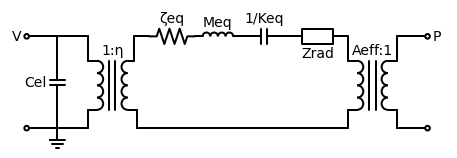

In [6]:
my_second_pmut.eq_circuit()

A complete pMUT with routings and pads can be generated with a separate class `Individual_pMUT`.
It takes as arguments pMUT type (from the two object classes presented above), and geometrical parameters regarding the pads and routings. 
It can either be drawn inline as shown before or drawn+saved to a .gds with the method `.draw_save_layout()`:

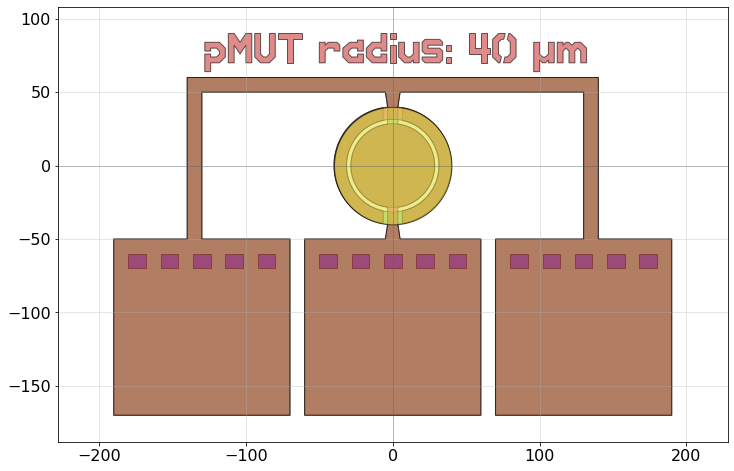

'It generates a default file "test_layout.gds", or you can pass a file name as a string argument'

In [7]:
my_complete_pMUT = Individual_pMUT(
                pMUT_Type = my_second_pmut, # pMUT object, either Unipolar_Individual_pMUT or Bipolar_Individual_pMUT
                Pad_Size = 120e-6,          # Pads lateral dimensions
                Pad_Distance = 10e-6,       # Distance between the pads and the pMUT
                Routing_Width = 10e-6,      # Width of the metal lines
                Routing_Distance = 10e-6,   # Distance from the metal lines
                Via_Size = 10e-6,           # vertical dimenstion of the vias
                Label_Size = 20e-6          # font size of the label
                )

my_complete_pMUT.draw_layout()
qp(my_complete_pMUT.layout)

'''To draw+save to a gds file use the following method:'''

# my_complete_pMUT.draw_save_layout()

'''It generates a default file "test_layout.gds", or you can pass a file name as a string argument'''

## Comparison between the Model and Finite Element Analysis single pMUT response

Below I benchmark the pMUT model against FEA by comparing the resonance frequency obtained from the equivalent parameters and the same model built in COMSOL.
In COMSOL, eigenfrequency studies are used to obtain the plates resonance points in the stressed and unstressed cases. For simplicity, the stiffness is approximated assuming full coverage of the plate by the electrodes.
In the curves below, the metal stresses are kept to 0 MPa, the stress in the elastic layer is kept at -100 MPa, while the stress in the AlN layer is swept. The AlN and Silicon Oxide layers are 1 µm thick and the aluminum and platinum metal layers are 200 nm thick. The pMUT radius is 40 µm.

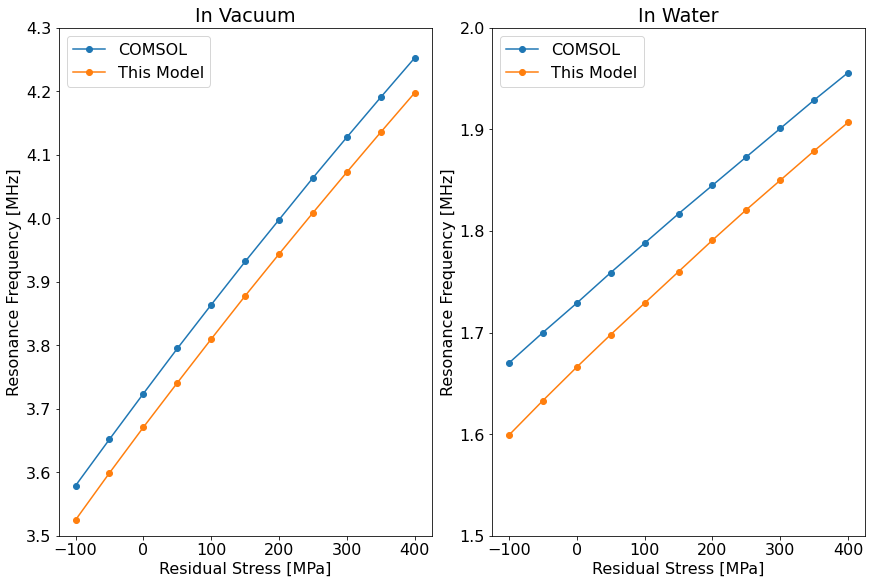

In [8]:
# AlN stress values in  MPa
AlN_Stresses = np.linspace(-100, 400, 11) 

# Models outputs in MHz
COMSOL_resonance_vac = np.array([3.579, 3.652, 3.724, 3.795, 3.864, 3.932, 3.998, 4.064, 4.128, 4.191, 4.253])
This_model_resonance_vac = np.array([3.525, 3.599, 3.671, 3.741, 3.810, 3.878, 3.944, 4.009, 4.073, 4.136, 4.198])
COMSOL_resonance_water = np.array([1.670, 1.700, 1.729, 1.759, 1.788, 1.817, 1.845, 1.873, 1.901, 1.929, 1.956])
This_model_resonance_water = np.array([1.599, 1.633, 1.666, 1.698, 1.729, 1.760, 1.791, 1.821, 1.850, 1.879, 1.907])

# Plotting
fig, ax = plt.subplots(1,2,constrained_layout = True)
ax1 = ax.flat[0]
ax2 = ax.flat[1]

ax1.set_title('In Vacuum')
ax1.set_xlabel('Residual Stress [MPa]')
ax1.set_ylabel('Resonance Frequency [MHz]')
ax1.set_ylim([3.5,4.3])

ax2.set_title('In Water')
ax2.set_xlabel('Residual Stress [MPa]')
ax2.set_ylabel('Resonance Frequency [MHz]')
ax2.set_ylim([1.5,2])

ax1.plot(AlN_Stresses, COMSOL_resonance_vac, '-o', label="COMSOL")
ax1.plot(AlN_Stresses, This_model_resonance_vac, '-o', label="This Model")
ax2.plot(AlN_Stresses, COMSOL_resonance_water, '-o', label="COMSOL")
ax2.plot(AlN_Stresses, This_model_resonance_water, '-o', label="This Model")

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.show()

The model seems to track well the responses obtained from COMSOL, showing a slightly more compliant response but always well within 10% of the COMSOL resonance. This test is useful to check the values of the equivalent mass, equivalent stiffness, and the radiation impedance. To check the value of the coupling parameter η we can compare the displacement obtained in COMSOL when a static voltage is applied. In this case we remove the top and bottom electrodes from the 40 µm radius pMUT by setting their thickness to 0 nm. We keep the AlN layer thickness at 1 µm and its stress at 0 MPa. The silicon oxide layer thickness is varied and a constant stress of -100 MPa is used. We actuate the plate assuming a unipolar pMUT (only central electrode) with a radius equal to 0.6*40 µm.

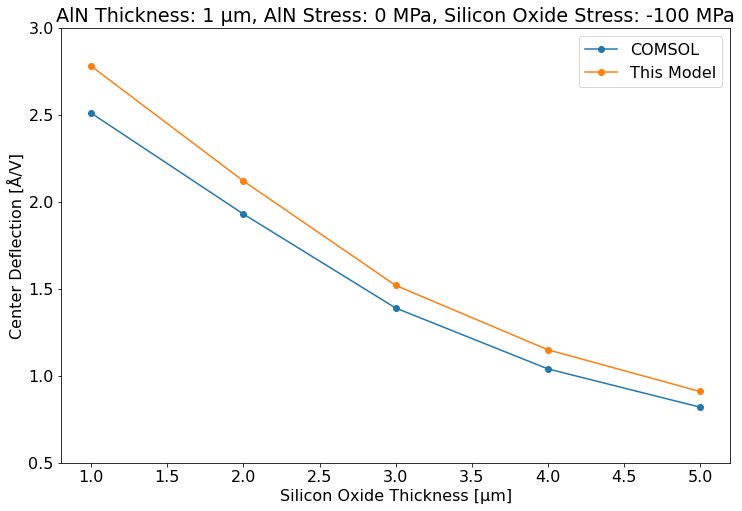

In [9]:
this_model_deflection = np.array([2.78, 2.12, 1.52, 1.15, 0.91])
comsol_deflection = np.array([2.51, 1.93, 1.39, 1.04, 0.82])
oxide_thicknesses = np.array([1,2,3,4,5])

fig, ax = plt.subplots()
ax.plot(oxide_thicknesses, comsol_deflection, '-o', label="COMSOL")
ax.plot(oxide_thicknesses, this_model_deflection, '-o', label="This Model")

ax.set_title('AlN Thickness: 1 µm, AlN Stress: 0 MPa, Silicon Oxide Stress: -100 MPa')
ax.set_xlabel('Silicon Oxide Thickness [µm]')
ax.set_ylabel('Center Deflection [Å/V]')
ax.legend(loc='upper right')
ax.set_ylim([0.5, 3])
plt.show()


## pMUTs Arrays Layout

We can generate the layout of arrays of pMUTs using the `Columns_Array()` class. The pMUTs that make up the array can be either unipolar or bipolar, and the pMUTs in each column can be connected either in series or in parallel. To select which pMUT and connection type we want in the array we pass one of the following classes to the `pMUT_Type` variable:

- Series_Column_Array_Element_Bipolar_pMUT()
- Series_Column_Array_Element_Unipolar_pMUT()
- Parallel_Column_Array_Element_Bipolar_pMUT()
- Parallel_Column_Array_Element_Unipolar_pMUT()

For example, we can create an instance of a 2 by 3 array with columns of bipolar pMUTs connected in series:

In [10]:
# Single pMUT parameters
my_array_element = Series_Column_Array_Element_Bipolar_pMUT(
                   pMUT_Radius=40e-6, 
                   BottomMetalLayer=0,
                   ViasLayer=1,
                   TopMetalLayer=2,
                   BackEtchLayer=3, 
                   Center_Electrode_Fraction=0.6,
                   Electrodes_Gap=2.5e-6,
                   Connection_Width=5e-6,
                   Orientation=0,
                   Elastic_Material = Silicon_Oxide,
                   Elastic_Thickness = 1e-6,
                   Elastic_Stress = 0e6,
                   Bottom_Electrode_Material = Molybdenum,
                   Bottom_Electrode_Thickness = 100e-9,
                   Bottom_Electrode_Stress = 0e6,
                   Piezo_Material = ScAlN(36),
                   Piezo_Thickness = 0.5e-6,
                   Piezo_Stress = 0e6,
                   Top_Electrode_Material = Aluminum,
                   Top_Electrode_Thickness = 100e-9,
                   Top_Electrode_Stress = 0e6,
                   Medium_Material = Water
                   )

# pMUTs arrays parameters
my_first_array = Columns_Array(
                 pMUT_Type = my_array_element, # pMUT class to put in the array. Bipolar/Unipolar and Series/Parallel columns
                 Rows = 2,                     # Number of rows in the array
                 Columns = 3,                  # Number of columns in the array
                 Pitch = 200e-6,               # Distance between pMUTs in the array [m]
                 Pad_Size = 100e-6,            # Lateral dimensions of the array pads [m]
                 Pad_Distance = 30e-6,         # Distance of the pads from the array [m]
                 Routing_Width = 20e-6,        # Width of the connections between pMUTs [m]
                 Routing_Distance = 10e-6,     # Distance of the routings from the pMUTs [m]
                 Via_Size = 10e-6,             # Lateral dimensions of the vias [m]
                 Label_Size = 15e-6,           # Dimensions of the label at the bottom of the array [m] (can be set to zero to eliminate it)
                 Connected_Columns=False       # Only for pMUT columns with electrodes connected in parallel
                 )


The array is genereated in the same way as the individual pMUTs

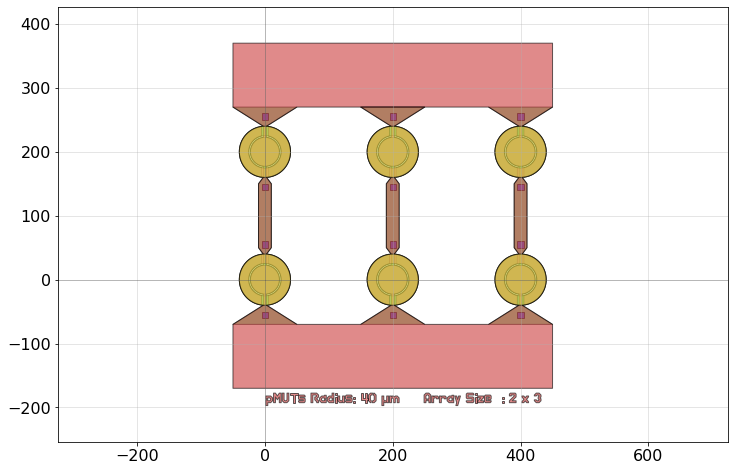

In [11]:
my_first_array.draw_layout()
qp(my_first_array.layout)

The array dimensions can be scaled up as needed. If an array with the pMUT columns are connected in parallel, but disconnected from each other, we can use the `Parallel_Column_Array_Element_Bipolar_pMUT` or the `Parallel_Column_Array_Element_Unipolar_pMUT` classes. For the parallel class, the pads on the side are always connected to set the Ground for the whole array, and the column Signal can be accessed both from the top and the bottom pad. The `Connected_Columns` flag in the array class variables can be set to True or False to connect the columns pads together ot not.

For example

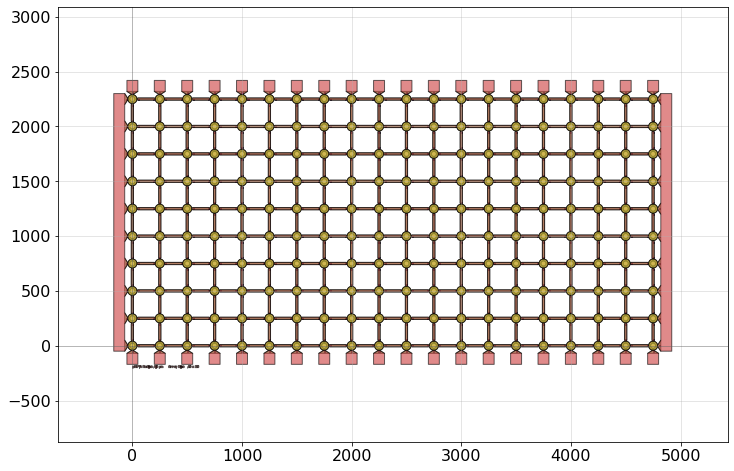

"Use the method draw_save_layout('file_name') like in the individual pMUTs case to generate a .gds file"

In [12]:
my_array_element = Parallel_Column_Array_Element_Bipolar_pMUT( # <=== pMUT column element connected in parallel
                   pMUT_Radius=40e-6, 
                   BottomMetalLayer=0,
                   ViasLayer=1,
                   TopMetalLayer=2,
                   BackEtchLayer=3, 
                   Center_Electrode_Fraction=0.6,
                   Electrodes_Gap=2.5e-6,
                   Connection_Width=5e-6,
                   Orientation=0,
                   Elastic_Material = Silicon_Oxide,
                   Elastic_Thickness = 1e-6,
                   Elastic_Stress = 0e6,
                   Bottom_Electrode_Material = Molybdenum,
                   Bottom_Electrode_Thickness = 100e-9,
                   Bottom_Electrode_Stress = 0e6,
                   Piezo_Material = ScAlN(36),
                   Piezo_Thickness = 0.5e-6,
                   Piezo_Stress = 0e6,
                   Top_Electrode_Material = Aluminum,
                   Top_Electrode_Thickness = 100e-9,
                   Top_Electrode_Stress = 0e6,
                   Medium_Material = Water
                   )

my_second_array = Columns_Array(
                  pMUT_Type = my_array_element, # pMUT class to put in the array. Bipolar/Unipolar and Series/Parallel columns
                  Rows = 10,                    # Number of rows in the array
                  Columns = 20,                 # Number of columns in the array
                  Pitch = 250e-6,               # Distance between pMUTs in the array [m]
                  Pad_Size = 100e-6,            # Lateral dimensions of the array pads [m]
                  Pad_Distance = 30e-6,         # Distance of the pads from the array [m]
                  Routing_Width = 20e-6,        # Width of the connections between pMUTs [m]
                  Routing_Distance = 10e-6,     # Distance of the routings from the pMUTs [m]
                  Via_Size = 10e-6,             # Lateral dimensions of the vias [m]
                  Label_Size = 20e-6,           # Dimensions of the label at the bottom of the array [m] (can be set to zero to eliminate it)
                  Connected_Columns=False       # Only for pMUT columns with electrodes connected in parallel
                  )

my_second_array.draw_layout()
qp(my_second_array.layout)

'''Use the method draw_save_layout('file_name') like in the individual pMUTs case to generate a .gds file'''

When the pMUTs array is used for transmission, we can provide phased signals to each column to do beam-steering. We can use the `plot_directivity_function` method to visualize where the acoustic energy is directed based on the pMUTs/array dimensions and frequency of operation: 

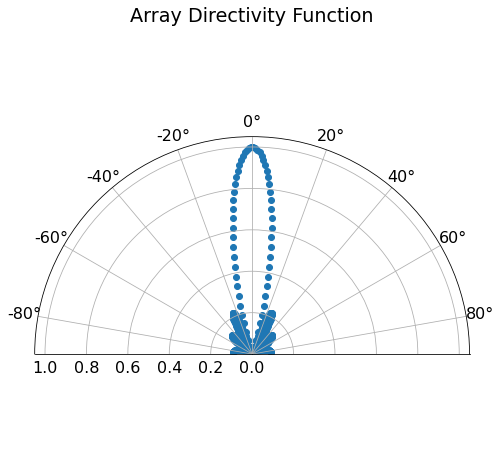

In [13]:
my_second_array.plot_directivity_function()

If no parameters are passed, the function will default to all columns being driven in phase and operation at the resonance frequency of the individual pMUTs. Phases and frequency can be specified as input parameters (for the phase pass a list/numpy array with the same length as number of columns). Other parameters that can be specified are the number of points along the polar direction (theta) and the azimuthal angle (phi):

20


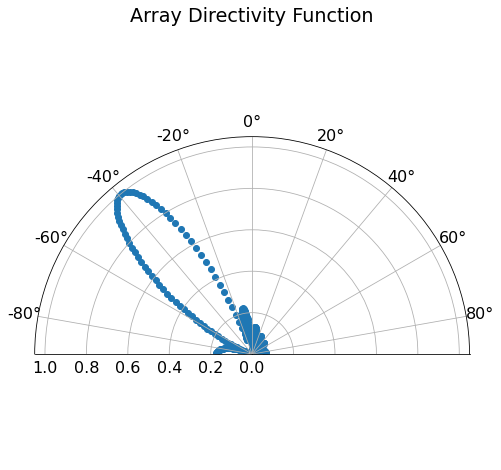

In [14]:
N_points = 300

print(my_second_array.columns_number)
my_second_array.plot_directivity_function(
                                        thetas = np.linspace(-np.pi/2,np.pi/2,N_points), # Specify number of points you want to plot on the polar coordinate
                                        phi = 0*np.pi/2,  # Currently set along the x-axis. Use np.pi/2 for y-axis
                                        phases = np.linspace(-2*np.pi, 2*np.pi, my_second_array.columns_number), # column phases spaced between -90 and +90 degrees
                                        frequency = 1000e3, # Operational frequency of 500 kHz
                                        farfield = 3e-2
                                        )

The obtained radiation pattern matches the ones observed in COMSOL for the same array dimensions and phases.

Running the array instance all relevant parameters can be listed as in the individual pMUTs case.

In [15]:
my_second_array

ARRAY PROPERTIES
Array size: 10 by 20
Column pMUTs connection: Parallel
Single column capacitance: 13.12 pF

pMUT ELEMENT PROPERTIES
                                         VALUE UNIT
pMUT radius                                 40   µm
Elastic layer material           Silicon Oxide    -
Elastic layer thickness                    1.0   µm
Elastic layer stress                         0  MPa
Bottom electrode material           Molybdenum    -
Bottom electrode thickness                 100   nm
Bottom electrode stress                      0  MPa
Piezo layer material        36.0% Scandium AlN    -
Piezo layer thickness                      0.5   µm
Piezo layer stress                           0  MPa
Top electrode material                Aluminum    -
Top electrode thickness                    100   nm
Top electrode stress                         0  MPa

                  VALUE    UNIT                        DESCRIPTION
f_eigen           3.019   [MHz]      Resonance frequency in vacuum
f_re